In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import HTML, display, IFrame
import html

In [2]:
df = pd.read_json("./data/merged_data_SA.json")

In [7]:
scores = ['sc_anticipation', 'sc_positive', 'sc_trust', 'sc_joy', 'sc_fear', 'sc_negative', 'sc_sadness', 'sc_disgust', 'sc_anger', 'sc_surprise']

In [3]:
df.columns

Index(['index', 'total_awards_received', 'approved_at_utc', 'ups', 'awarders',
       'mod_reason_by', 'banned_by', 'author_flair_type', 'removal_reason',
       'link_id', 'author_flair_template_id', 'likes', 'user_reports', 'saved',
       'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived',
       'no_follow', 'author', 'can_mod_post', 'send_replies', 'parent_id',
       'score', 'author_fullname', 'report_reasons', 'approved_by',
       'all_awardings', 'subreddit_id', 'body', 'edited',
       'author_flair_css_class', 'steward_reports', 'is_submitter', 'downs',
       'author_flair_richtext', 'author_patreon_flair', 'body_html',
       'gildings', 'collapsed_reason', 'associated_award', 'stickied',
       'subreddit_type', 'can_gild', 'subreddit', 'author_flair_text_color',
       'score_hidden', 'permalink', 'num_reports', 'locked', 'name', 'created',
       'author_flair_text', 'collapsed', 'created_utc',
       'subreddit_name_prefixed', 'controversiality', 'depth',

In [4]:
df['subreddit'].value_counts()

Conservative            9136
Libertarian             7784
Economics               5595
ElizabethWarren         3896
history                 3619
business                2485
law                     2449
Beto2020                1839
environment             1724
democrats               1623
energy                  1376
conservatives           1200
LGBTnews                 966
education                922
Liberal                  770
BernieSanders            726
JoeBiden                 408
Kamala                   386
AmericanPolitics         365
bidenbro                 320
egalitarian              270
Democrats2020            204
bernie                   202
Kossacks_for_Sanders     173
LibertarianLeft          133
Delaney2020               94
government                84
BetoORourke               83
democracy                 57
corybooker                52
inslee2020                42
Communist                 41
BillWeld                  26
LibertarianSocialism      25
JoeWalsh      

In [5]:
def nice_catplot(df, groupby, y, title):
    display(HTML('<center><h1 style="fontsize: 14;">Sentiment <span style="color:green">'+title+'</span> by Subreddit</h1></center>'))
    grid=sns.catplot(kind="box", x=groupby, y=y, data=df, linewidth=2.5, aspect=3, palette='Blues_d')
    # grid.ax.set_yscale('log')
    grid.set_xticklabels(rotation=70);
    # grid.savefig("Score_Stats_by_sub.png")

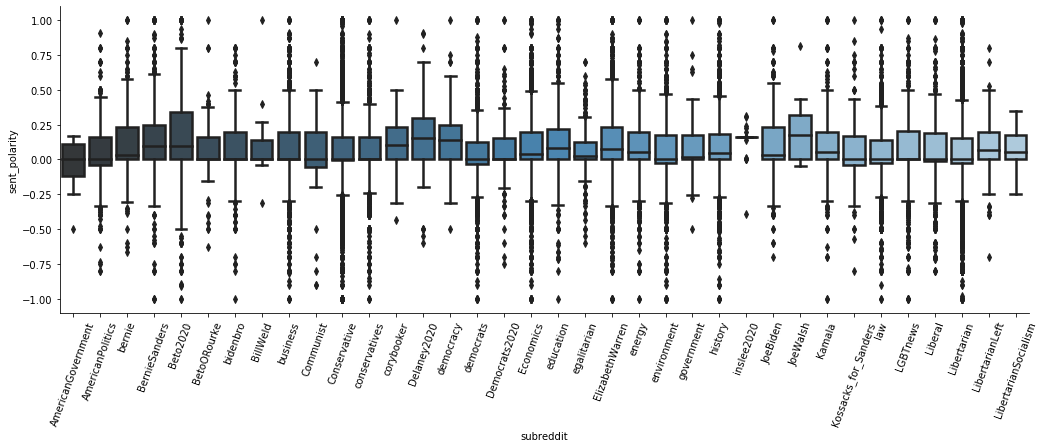

In [28]:
nice_catplot(df, 'subreddit', 'sent_polarity', 'Polarity')

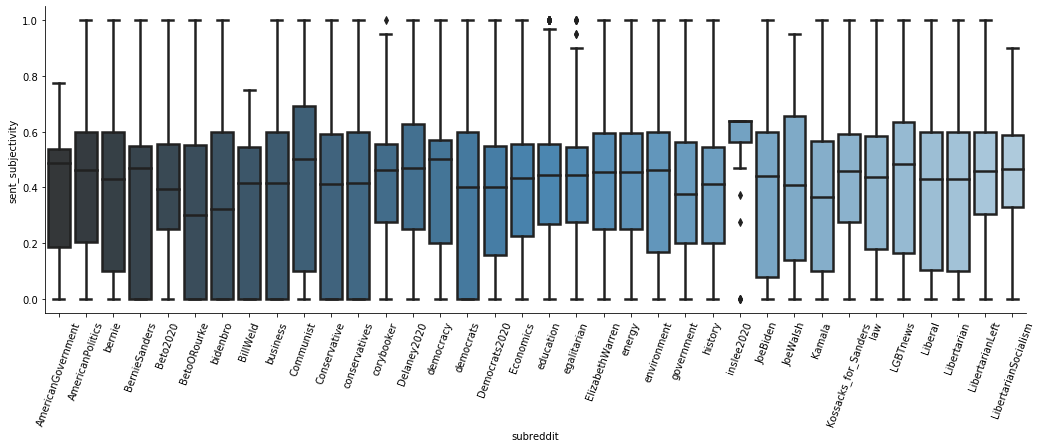

In [29]:
nice_catplot(df, 'subreddit', 'sent_subjectivity', 'Subjectivity')

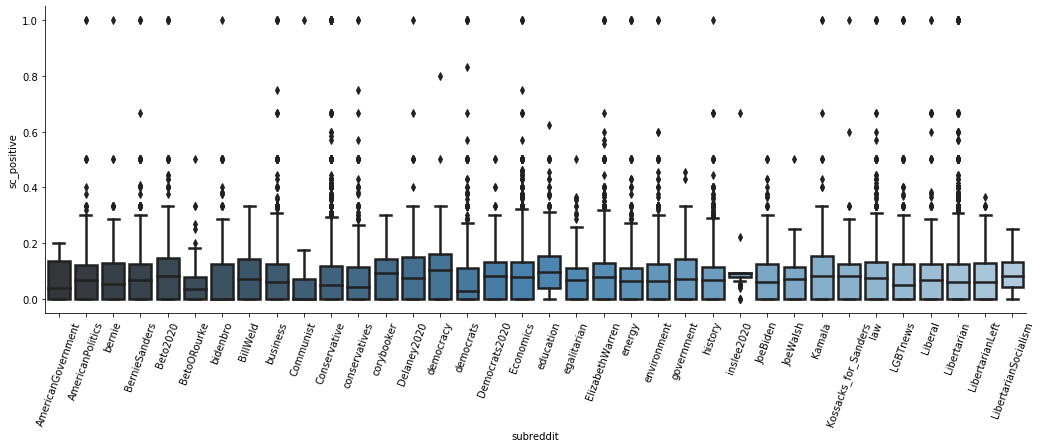

In [38]:
nice_catplot(df, 'subreddit', 'sc_positive', 'Positive')

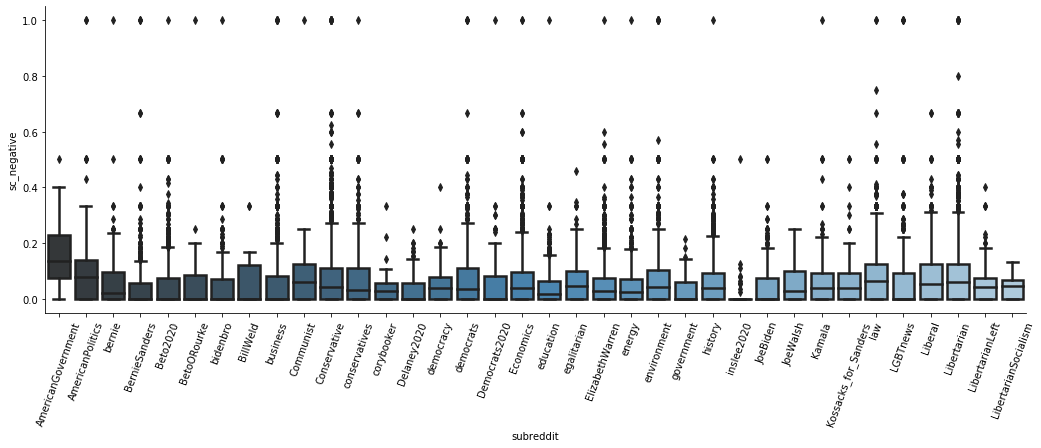

In [39]:
nice_catplot(df, 'subreddit', 'sc_negative', 'Negative')

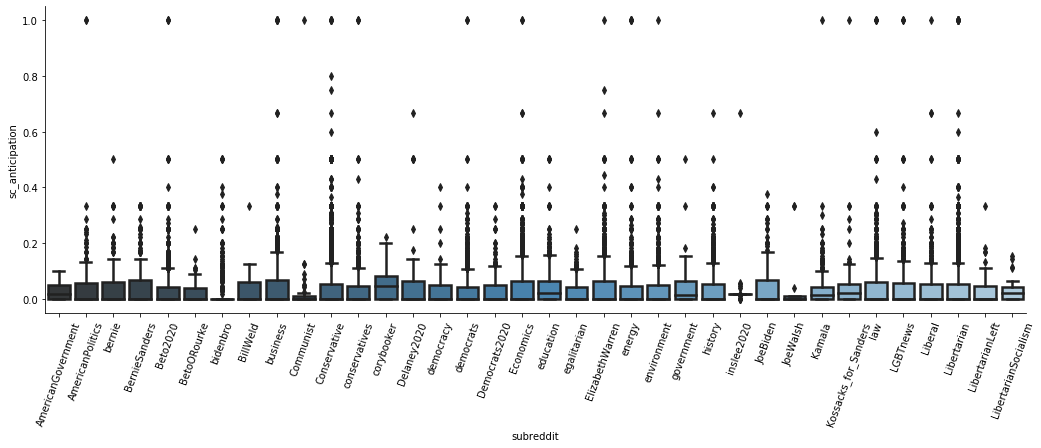

In [30]:
nice_catplot(df, 'subreddit', 'sc_anticipation', 'Anticipation')

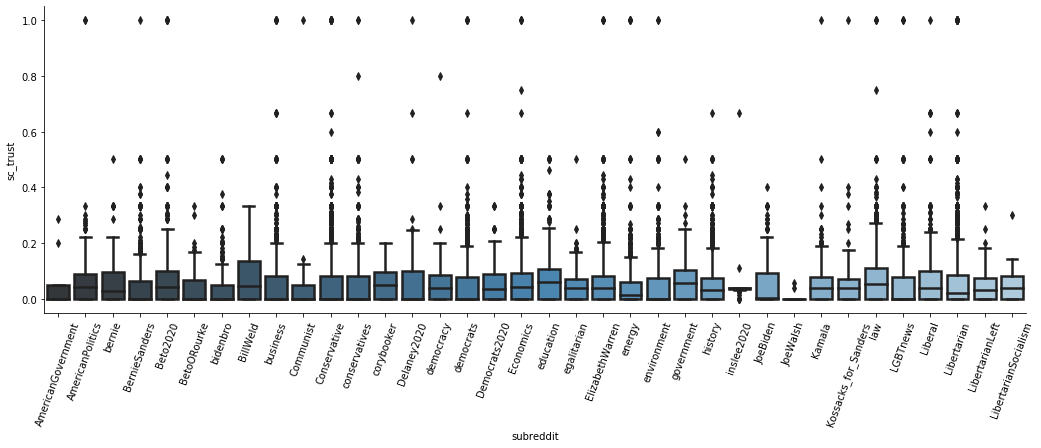

In [31]:
nice_catplot(df, 'subreddit', 'sc_trust', 'Trust')

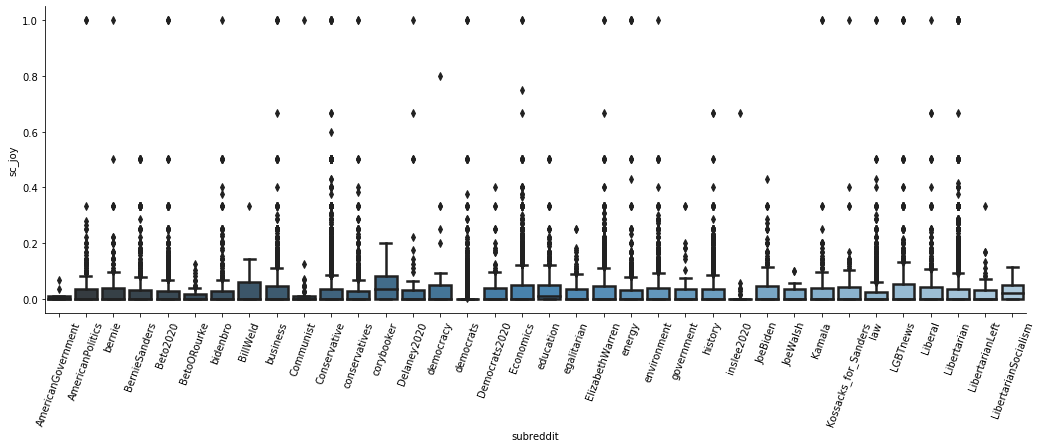

In [32]:
nice_catplot(df, 'subreddit', 'sc_joy', 'Joy')

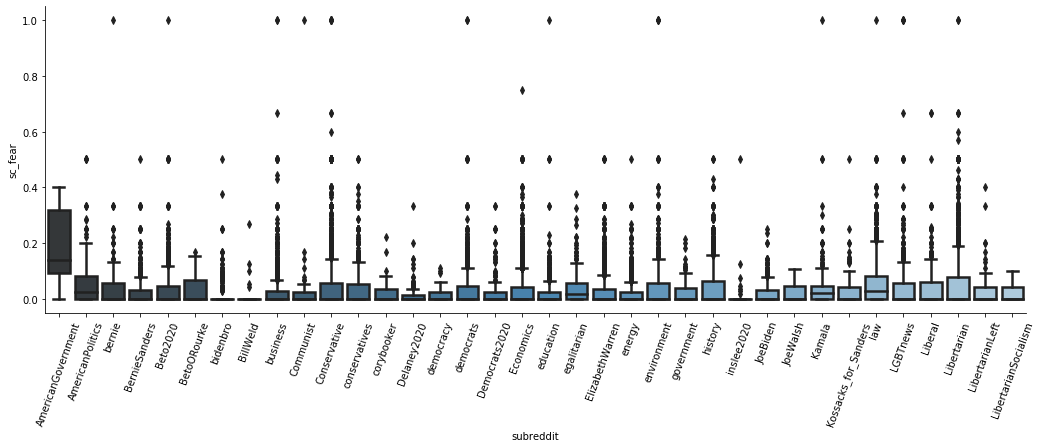

In [33]:
nice_catplot(df, 'subreddit', 'sc_fear', 'Fear')

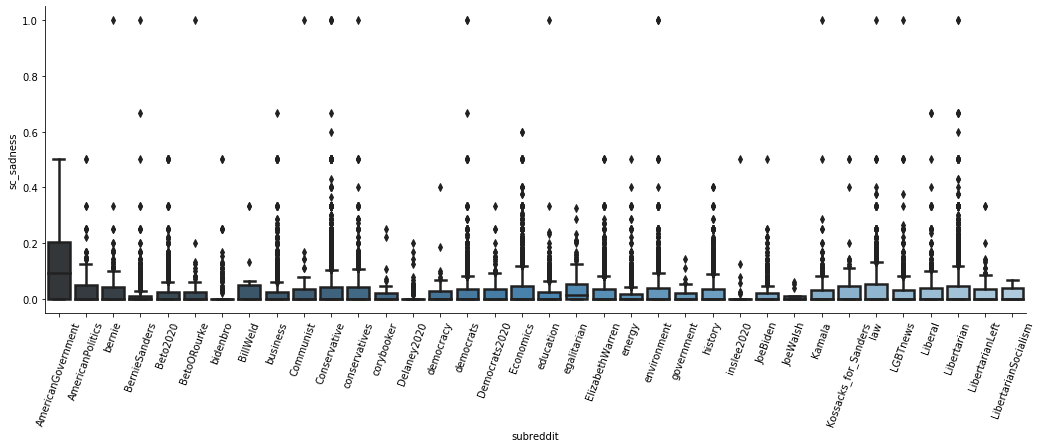

In [34]:
nice_catplot(df, 'subreddit', 'sc_sadness', 'Sadness')

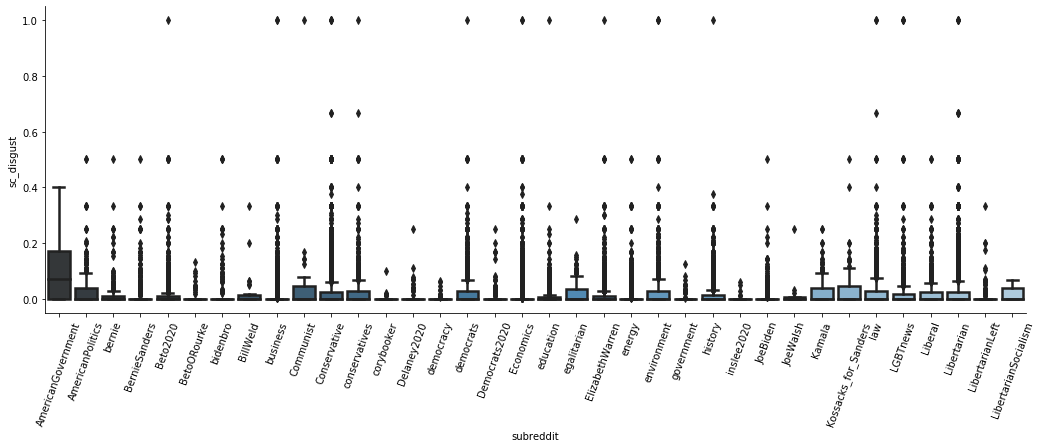

In [35]:
nice_catplot(df, 'subreddit', 'sc_disgust', 'Disgust')

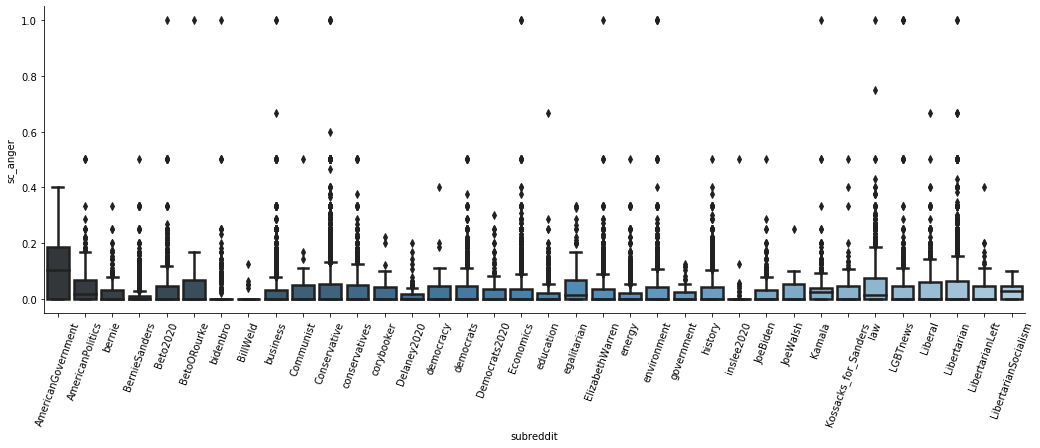

In [36]:
nice_catplot(df, 'subreddit', 'sc_anger', 'Anger')

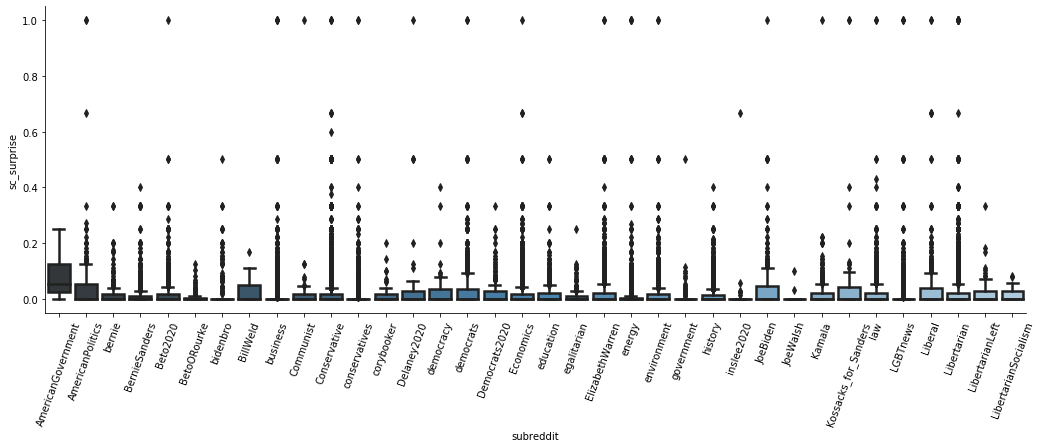

In [37]:
nice_catplot(df, 'subreddit', 'sc_surprise', 'Surprise')

### *AmericanGovernment* seems to be quite a controversial subreddit

In [8]:
df[ df['subreddit'] == 'AmericanGovernment' ][scores]

,sc_anticipation,sc_positive,sc_trust,sc_joy,sc_fear,sc_negative,sc_sadness,sc_disgust,sc_anger,sc_surprise
0,0.000000,0.000000,0.000000,0.000000,0.400000,0.400000,0.400000,0.400000,0.400000,0.200000
1,0.041667,0.041667,0.000000,0.000000,0.125000,0.125000,0.083333,0.041667,0.125000,0.041667
2,0.034483,0.034483,0.000000,0.034483,0.137931,0.172414,0.137931,0.103448,0.103448,0.034483
3,0.100000,0.200000,0.200000,0.000000,0.300000,0.100000,0.100000,0.100000,0.100000,0.100000
4,0.000000,0.000000,0.000000,0.000000,0.375000,0.500000,0.500000,0.375000,0.375000,0.250000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.142857,0.285714,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000
28,0.066667,0.133333,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667


#### We only have 8 records for it...

# Correlation of sentiments on each Subreddit

In [31]:
corr = df.groupby(by='subreddit')[scores].corr()
corr

sc_anticipation  sc_positive  sc_trust  \
subreddit                                                                    
AmericanGovernment sc_anticipation         1.000000     0.725961  0.173206   
                   sc_positive             0.725961     1.000000  0.751356   
                   sc_trust                0.173206     0.751356  1.000000   
                   sc_joy                  0.388465     0.226193 -0.306584   
                   sc_fear                -0.120231    -0.138162  0.086776   
...                                             ...          ...       ...   
law                sc_negative             0.015684    -0.045694 -0.017609   
                   sc_sadness              0.016119    -0.059418 -0.035893   
                   sc_disgust              0.052233    -0.013948  0.046685   
                   sc_anger                0.093449     0.027159  0.010030   
                   sc_surprise             0.434527     0.343540  0.356141   

                                      sc_joy   sc_fear  sc_negative  \
subreddit                                                             
AmericanGovernment sc_anticipation  0.388465 -0.120231    -0.474108   
                   sc_positive      0.226193 -0.138162    -0.485316   
                   sc_trust        -0.306584  0.086776    -0.184341   
                   sc_joy           1.000000 -0.510930    -0.390567   
                   sc_fear         -0.510930  1.000000     0.866054   
...                                      ...       ...          ...   
law                sc_negative     -0.004110  0.589373     1.000000   
                   sc_sadness       0.018682  0.522046     0.594337   
                   sc_disgust       0.038546  0.425905     0.555216   
                   sc_anger        -0.003347  0.633220     0.613961   
                   sc_surprise      0.605850  0.059464     0.062828   

                                    sc_sadness  sc_disgust  sc_anger  \
subreddit                                                              
AmericanGovernment sc_anticipation   -0.369808   -0.356466 -0.342384   
                   sc_positive       -0.531104   -0.495532 -0.532053   
                   sc_trust          -0.350152   -0.314479 -0.360186   
                   sc_joy            -0.317837   -0.321874 -0.366113   
                   sc_fear            0.857164    0.886285  0.877686   
...                                        ...         ...       ...   
law                sc_negative        0.594337    0.555216  0.613961   
                   sc_sadness         1.000000    0.360022  0.415018   
                   sc_disgust         0.360022    1.000000  0.522651   
                   sc_anger           0.415018    0.522651  1.000000   
                   sc_surprise        0.082761    0.078499  0.037076   

                                    sc_surprise  
subreddit                                        
AmericanGovernment sc_anticipation    -0.149532  
                   sc_positive        -0.315816  
                   sc_trust           -0.297060  
                   sc_joy             -0.193616  
                   sc_fear             0.843310  
...                                         ...  
law                sc_negative         0.062828  
                   sc_sadness          0.082761  
                   sc_disgust          0.078499  
                   sc_anger            0.037076  
                   sc_surprise         1.000000  

[360 rows x 10 columns]

In [92]:
def nice_heatmap(corr, subreddit, width=(8,8)):
    display(HTML('<center><h1 style="fontsize: 14;">Sentiment Correlations on <span style="color:blue">'+subreddit+'</span> Subreddit</h1></center>'))
    mask = np.zeros_like(corr.loc[subreddit])
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr.loc[subreddit], mask=mask, vmax=.3, square=True, annot=True)
        fig = plt.gcf()
        fig.set_size_inches(width)

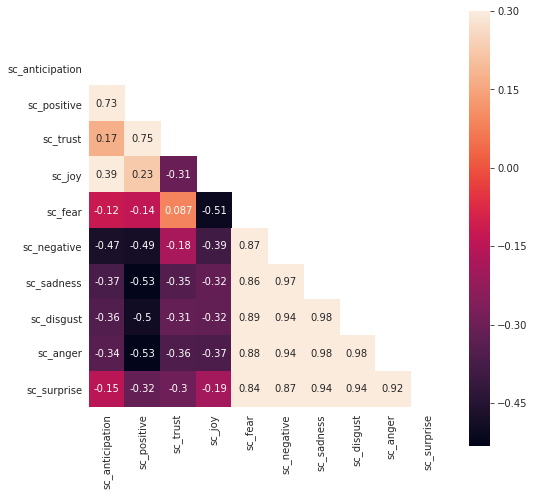

In [93]:
nice_heatmap(corr, 'AmericanGovernment')

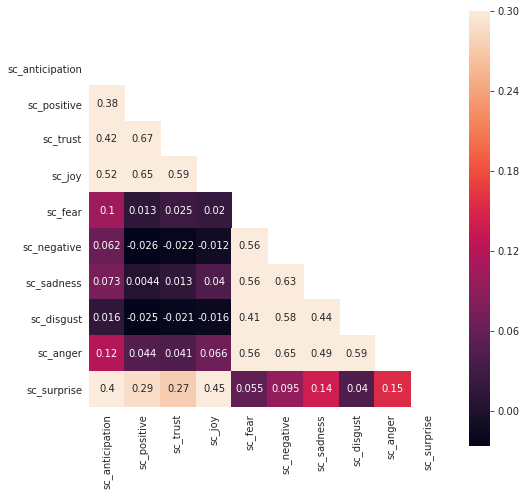

In [94]:
nice_heatmap(corr, 'Conservative')

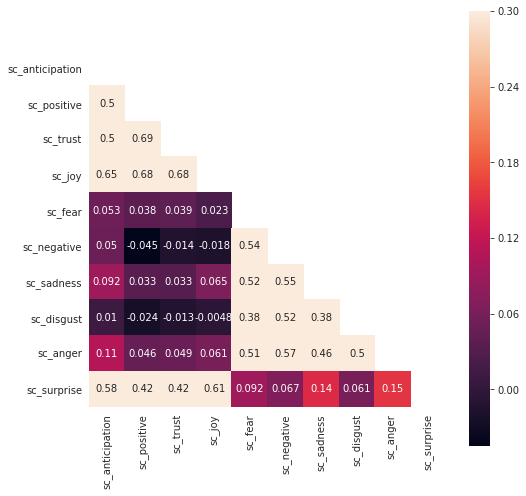

In [95]:
nice_heatmap(corr, 'Libertarian')

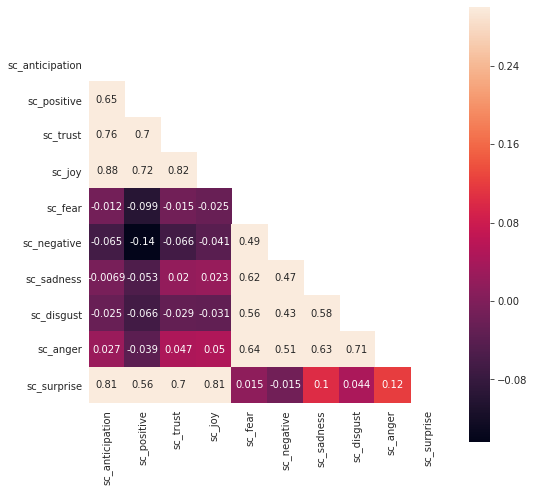

In [102]:
nice_heatmap(corr, 'AmericanPolitics')

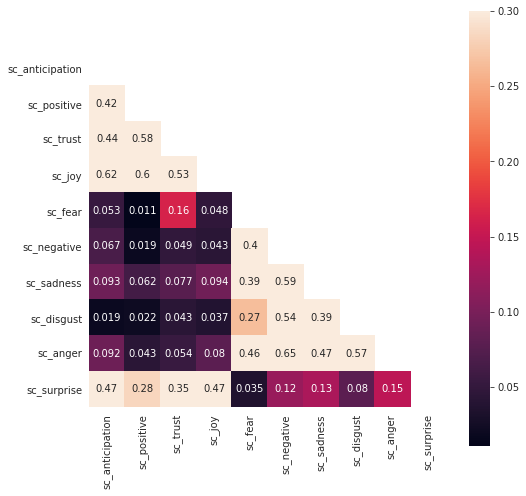

In [97]:
nice_heatmap(corr, 'ElizabethWarren')

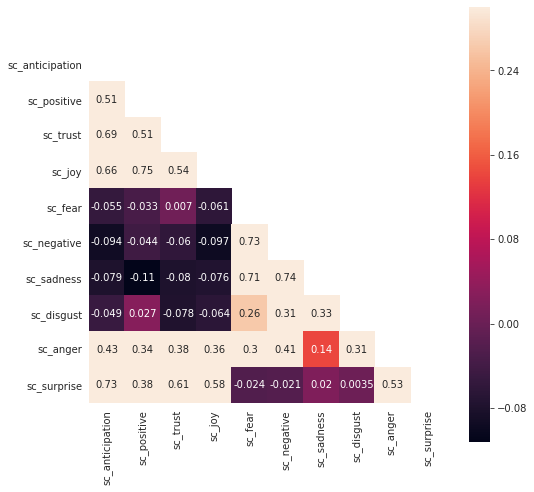

In [101]:
nice_heatmap(corr, 'Kamala')

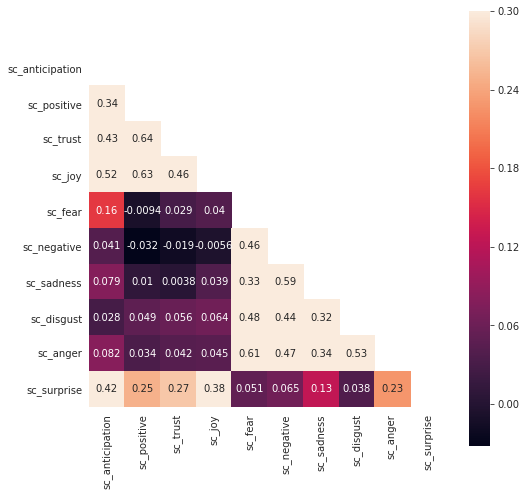

In [100]:
nice_heatmap(corr, 'BernieSanders')

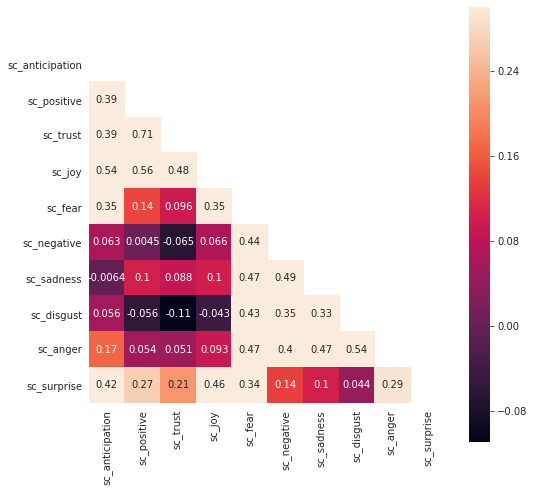

In [103]:
nice_heatmap(corr, 'Democrats2020')

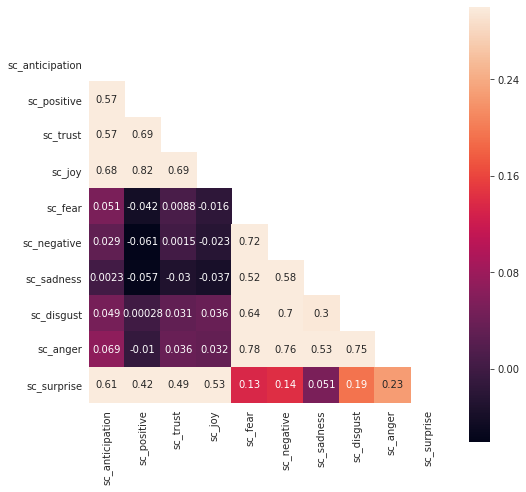

In [104]:
nice_heatmap(corr, 'LGBTnews')

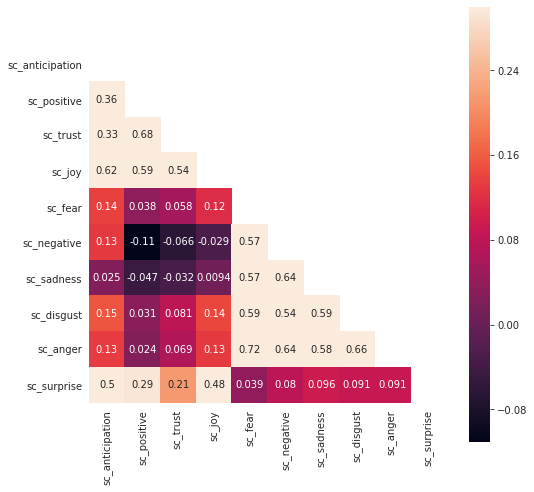

In [105]:
nice_heatmap(corr, 'Beto2020')

# Display comments with highest scores

In [136]:
def html_box(text):
    return "<div class='boxed'>"+text+"</div>"

def display_comments(cmts: list, title: str):
    css = '<style> .boxed { border: 1px solid green; margin: 10px; padding: 10px;} </style>'
    html = css+'<h2>Comment Examples with Highest <span style="color:red">'+title.replace('sc_', '').capitalize()+'</span> Score</h2>'
    for c in cmts:
        html += html_box(c)
    display(HTML(html))

In [137]:
for s in scores:
    display_comments(df[ df[s] == df[s].max()]['body'].sample(8).tolist(), s)